In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
bs = 64

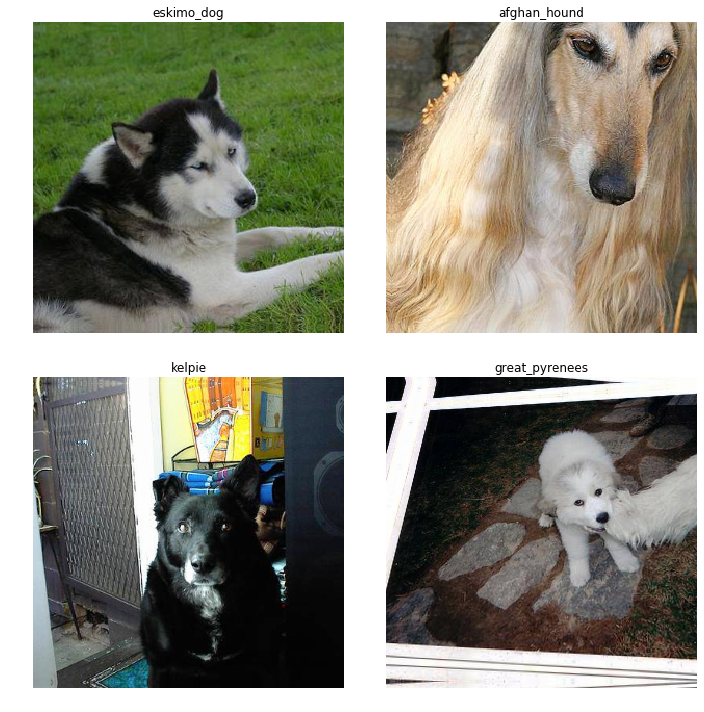

In [3]:
data = ImageDataBunch.from_csv("/data/kaggle/dog-breeds/", folder="train", suffix=".jpg", 
                               ds_tfms=get_transforms(), size=299, bs=56).normalize(imagenet_stats)
data.show_batch(rows=2, figsize=(10,10))

In [52]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [53]:
learn.fit_one_cycle(4)

Total time: 01:41
epoch  train_loss  valid_loss  error_rate
1      2.259136    0.831131    0.237205    (00:37)
2      1.007905    0.603798    0.189961    (00:21)
3      0.700258    0.509484    0.162402    (00:21)
4      0.543501    0.497181    0.153543    (00:21)



In [54]:
learn.save("stage-1")

In [57]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses(20)
len(data.valid_ds), len(losses), len(idxs)

(2032, 20, 20)

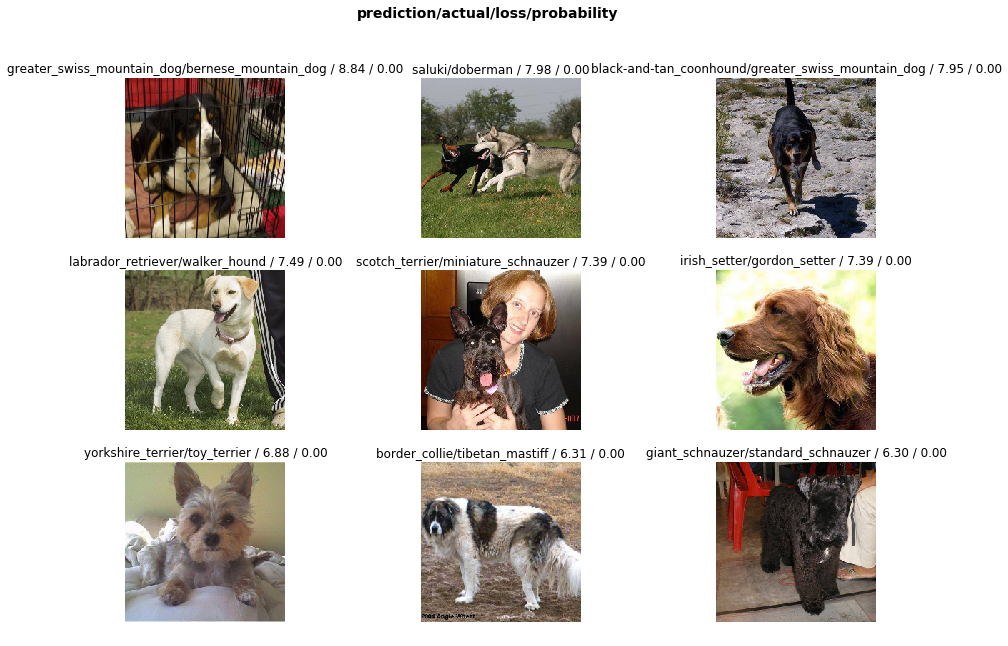

In [61]:
interp.plot_top_losses(9,figsize = (15,10))

In [64]:
learn.load("stage-1")

In [65]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


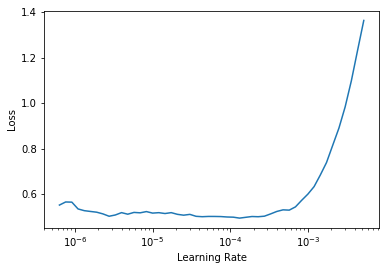

In [66]:
learn.recorder.plot()

In [68]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-6, 1e-4))

Total time: 04:34
epoch  train_loss  valid_loss  error_rate
1      0.460536    0.489217    0.151083    (00:26)
2      0.461894    0.489166    0.153051    (00:26)
3      0.447544    0.491245    0.156988    (00:27)
4      0.430715    0.491543    0.157972    (00:28)
5      0.396114    0.486821    0.152067    (00:28)
6      0.361639    0.485408    0.155512    (00:27)
7      0.343841    0.487124    0.156004    (00:27)
8      0.347705    0.482015    0.156004    (00:27)
9      0.325662    0.487678    0.156988    (00:27)
10     0.303429    0.482319    0.155512    (00:27)



In [4]:
learn50 = create_cnn(data, models.resnet50, metrics=error_rate)

In [6]:
learn50.fit_one_cycle(1)

Total time: 01:14
epoch  train_loss  valid_loss  error_rate
1      1.043504    0.493190    0.148623    (01:14)



In [7]:
learn50.unfreeze()

In [8]:
learn50.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


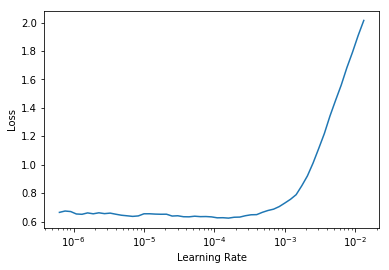

In [9]:
learn50.recorder.plot()

In [10]:
learn50.fit_one_cycle(3, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate
1,0.727441,0.679077,0.205128


RuntimeError: CUDA error: out of memory

In [ ]:
learn50.